# Task 1

## Regression

### Importing Necessary Libraries

##### These libraries include pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, statsmodels for statistical models, and scikit-learn for machine learning tasks such as linear regression, and random forest regression. 

In [116]:
# Importing all libraries that would be needed throughout the experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### The house price data in imported from a CSV file located in local drive

In [117]:
# Importing the Houseprice data
data = pd.read_csv("C:/Users/Dell/Desktop/project/DN BATCH  8/Scepter/Regression,Clustering,Classification& Neural Network Assignment/Task1 Regression/Houseprice_data.csv")

### Data Inspection/ Cleaning

##### The first few rows of the imported dataset is explored to provides a quick overview of the structure and content of the data, helping you understand its format and variables.

In [137]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

(None,
               price      bedrooms     bathrooms   sqft_living      sqft_lot  \
 count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
 mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
 std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
 min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
 25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
 50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
 75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
 max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   
 
              floors    waterfront          view     condition         grade  \
 count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
 mean       1.494309      0.007542      0.234303      3.409430      7.656873   
 std        0.539989      0.086

##### Summary of the dataset, including information about the data types of each column, the number of non-null values, and memory usage is shown below to understand the general structure of the dataset as well as overall statistical overview of the dataset.

In [120]:
# Checking for null values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### The number of duplicate rows in the dataset is calculated below. 

In [121]:
# After checking for duplicates, there was 5 duplicates which was then dropped
data.duplicated().sum()
data = data.drop_duplicates()

### Data Preprocessing

##### Feature scaling was performed and were examined for modeling but showed poor performance. 

In [122]:
# Scaling the data
columns=data.drop('price',axis=1).columns
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(data.drop('price',axis=1))
scaled_df = pd.DataFrame(data_rescaled, columns=columns)
scaled_df['price']=data['price']
scaled_df_no_nan = scaled_df.dropna()
scaled_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.398812,-1.447297,-0.979830,-0.228361,-0.915258,-0.087183,-0.305708,-0.629224,-0.558638,-0.734692,-0.658704,-0.544756,-0.210034,1.870034,-0.352515,-0.306089,-0.943358,-0.260749,221900.0
1,-0.398812,0.175615,0.533532,-0.189929,0.936944,-0.087183,-0.305708,-0.629224,-0.558638,0.460784,0.245041,-0.680946,4.748775,0.879485,1.161469,-0.746346,-0.432712,-0.187909,538000.0
2,-1.473987,-1.447297,-1.426218,-0.123349,-0.915258,-0.087183,-0.305708,-0.629224,-1.409372,-1.229788,-0.658704,-1.293800,-0.210034,-0.933408,1.283425,-0.135667,1.070048,-0.172418,180000.0
3,0.676363,1.149362,-0.130605,-0.244052,-0.915258,-0.087183,-0.305708,2.444073,-0.558638,-0.891674,1.397317,-0.204281,-0.210034,1.085070,-0.283238,-1.271814,-0.914179,-0.284553,604000.0
4,-0.398812,-0.148967,-0.435455,-0.169699,-0.915258,-0.087183,-0.305708,-0.629224,0.292095,-0.130917,-0.658704,0.544762,-0.210034,-0.073686,0.409528,1.199305,-0.272223,-0.192889,510000.0


##### The original dataset is further used for analysis

##### the correlation matrix for the dataset, which measures the pairwise correlations between different numerical variables is computed. This matrix provides insights into how variables are related to each other.

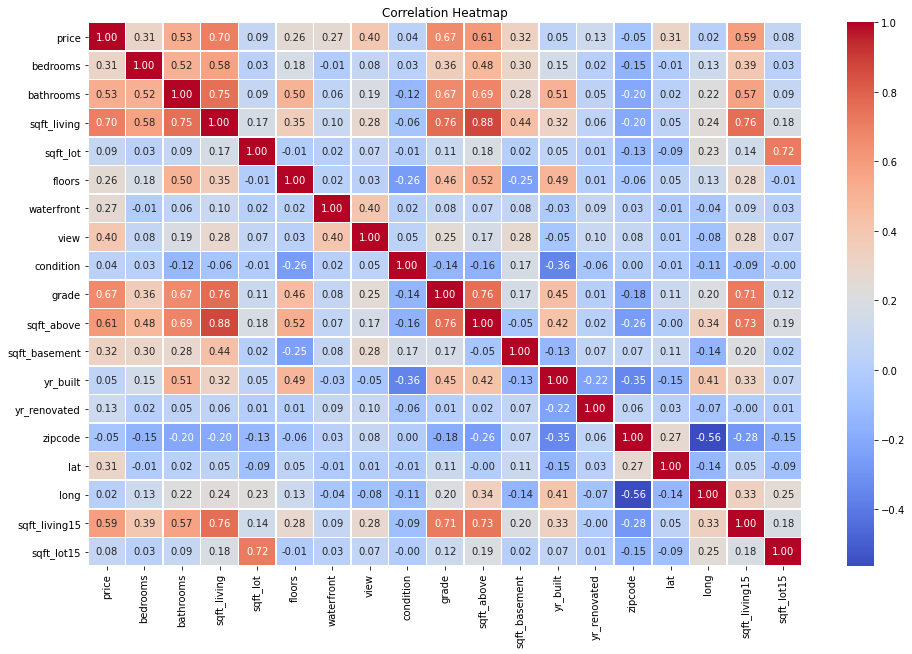

In [123]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##### The subsequent code calculates the Variance Inflation Factor (VIF) for each independent variable. VIF measures the level of multicollinearity among the independent variables.

In [124]:
# Extracting the independent variables
X = data.drop('price', axis=1)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         Variable           VIF
0        bedrooms  2.327113e+01
1       bathrooms  2.861125e+01
2     sqft_living           inf
3        sqft_lot  2.377671e+00
4          floors  1.689313e+01
5      waterfront  1.213032e+00
6            view  1.551931e+00
7       condition  3.470856e+01
8           grade  1.474317e+02
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built  9.586838e+03
12   yr_renovated  1.194942e+00
13        zipcode  1.630635e+06
14            lat  1.390023e+05
15           long  1.359460e+06
16  sqft_living15  2.710092e+01
17     sqft_lot15  2.598730e+00


##### The variable with VIF > 10 or infinity were removed after implementing the code below. 

In [125]:
# Function to calculate VIF
def calculate_vif(data_frame):
    variables = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for each variable
vif_result = calculate_vif(X)

# Identify variables with VIF > 10 or infinity
high_vif_variables = vif_result[vif_result['VIF'] > 10].append(vif_result[vif_result['VIF'] == np.inf])['Variable'].tolist()

# Drop variables from the DataFrame
X_filtered = X.drop(columns=high_vif_variables)

# Print the original and filtered DataFrames
print("Original DataFrame:")
print(X.head())
print("\nDataFrame after dropping variables with VIF > 10 or infinity:")
print(X_filtered.head())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Original DataFrame:
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.2

Several Columns were dropped due to being highly correlated with other features in the dataset, making them redundant and causing issues like infinite VIF values. Dropping them helps to address multicollinearity.

The retain variables are sqft_lot, waterfront, view, yr_renovated and sqft_lot15



### Training the Model

##### The filtered data after establishing multicolinearity are splitted into training and test set

In [126]:
# Splitting to test and train data
X_filtered['price']=data['price']
X_new=sm.add_constant(X_filtered.drop('price', axis=1))
y=X_filtered['price']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


       const  sqft_lot  waterfront  view  yr_renovated  sqft_lot15
9399     1.0     89640           0     0             0       54014
18667    1.0      7236           0     0             0        8431
9996     1.0      9579           0     0             0        9628
10973    1.0      8500           0     0          2010       10356
3043     1.0      4920           0     0             0        4960


##### Linear regression is fitted on the reduced features

In [127]:
# Using Linear Regression Model on the reduced features

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     750.9
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:11:18   Log-Likelihood:            -2.4421e+05
No. Observations:               17286   AIC:                         4.884e+05
Df Residuals:                   17280   BIC:                         4.885e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.81e+05   2901.170    165.801   

**The performance of the fitted model is poor as a result of low R-square. It is necessary to examine the whole features for any improvement**

In [128]:
# Splitting to test and train data on the whole features
X2=sm.add_constant(data.drop('price', axis=1))
y=data['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

##### Linear Regression for Full Features

In [129]:
# Using Linear Regression Model

# Fit the linear regression model
model2 = sm.OLS(y_train2, X_train2).fit()

# Print the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2357.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:11:18   Log-Likelihood:            -2.3554e+05
No. Observations:               17286   AIC:                         4.711e+05
Df Residuals:                   17268   BIC:                         4.712e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.746e+06   3.26e+06      2.687

**The performance of the model with full features significantly improves. The R-square gives 69% as against 17%

##### Exploring the residual Plot

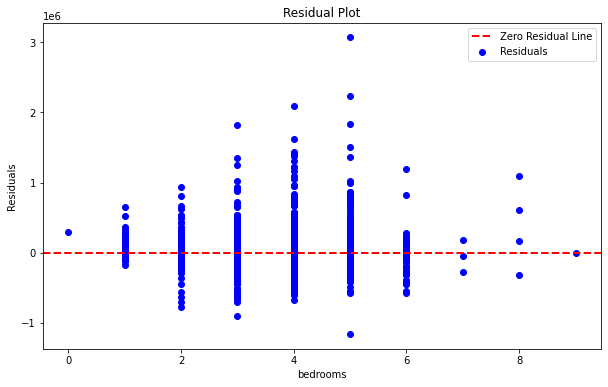

In [130]:
# Making predictions on the test set
y_pred2 = model2.predict(X_test2)

# Plotting residuals against one input (bedrooms)
plt.figure(figsize=(10, 6))
plt.scatter(X_test2['bedrooms'], y_test2 - y_pred2, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('bedrooms')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

##### Performance of the Model on Test Set

In [131]:
# Measuring the effectiveness of the model by using Mse and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  115038608079.14688
R-squared (R2) Score:  0.1928797281056296


In [132]:
# Measuring the effectiveness of the model by using Mse and R2 score
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)
print("Mean Squared Error: ", mse2)
print("R-squared (R2) Score: ", r22)

Mean Squared Error:  42388694078.18092
R-squared (R2) Score:  0.7025974595755697


**The fitted model consisting full features also perform well on the test set indicating a good predictive ability**

### Visualising the predicted model

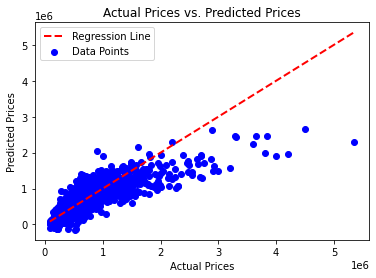

In [133]:
# Creating a scatter plot of actual vs. predicted prices and showing the regression line
plt.scatter(y_test2, y_pred2, color='blue', label='Data Points')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()

plt.show()


### Exploring Advanced Regression models

##### An advance model such as the Random Forest is employed to examine whether the model can be improved upon.

#### Random Forest

In [134]:
# Creating a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train2, y_train2)
y_pred2_rf = rf_regressor.predict(X_test2)

# E# Measuring the effectiveness of the Random Forest model by using Mse and R2 score
mse_rf = mean_squared_error(y_test2, y_pred2_rf)
r2_rf = r2_score(y_test2, y_pred2_rf)

print("Random Forest Regression - Mean Squared Error: ", mse_rf)
print("Random Forest Regression - R-squared (R2) Score: ", r2_rf)

Random Forest Regression - Mean Squared Error:  18224061506.107056
Random Forest Regression - R-squared (R2) Score:  0.8721384957325891


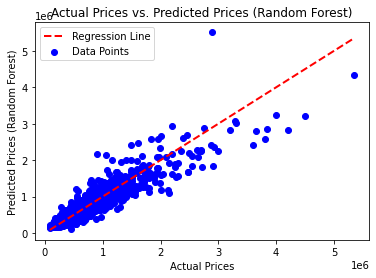

In [135]:
# Create a scatter plot of actual vs. predicted prices and showing the regression line
plt.scatter(y_test2, y_pred2_rf, color='blue', label='Data Points')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")
plt.legend()

plt.show()

** The result of the random forest showed a better performance than the linear regression model for the prediction of Houseprice_data**